# 체력인증센터 이용자 현황

In [97]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rc('font', family='NotoSansKR')
print(plt.rcParams['font.family'])

['NotoSansKR']


## 1. 데이터 로드

| 컬럼 영문명 | 컬럼 한글명 | 데이터타입 |
| :---: | :---: | :---: |
| TEST_CNT | 측정 회차 | NUMERIC |
| CENTER_NM	| 센터명 |	VARCHAR	|		
| AGE_GBN | 나이구분 | VARCHAR |
| TEST_GBN | 측정구분 | VARCHAR |
| TEST_AGE | 측정나이 | NUMERIC |
| INPUT_GBN | 입력구분 | VARCHAR |
| CERT_GBN | 상장구분 | VARCHAR |
| TEST_YMD | 측정일 | CHAR |
| TEST_SEX | 측정회원성별 | CHAR |

In [37]:
# 국민체력측정 현황 데이터
sttus_1901 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201901.csv')
sttus_1902 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201902.csv')
sttus_1903 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201903.csv')
sttus_1904 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201904.csv')
sttus_1905 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201905.csv')
sttus_1906 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201906.csv')
sttus_1907 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201907.csv')
sttus_1908 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201908.csv')
sttus_1909 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201909.csv')
sttus_1910 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201910.csv')
sttus_1911 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201911.csv')
sttus_1912 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201912.csv')
sttus_2001 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202001.csv')
sttus_2002 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202002.csv')
sttus_2003 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202003.csv')
sttus_2004 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202004.csv')
sttus_2005 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202005.csv')
sttus_2006 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202006.csv')
sttus_2007 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202007.csv')
sttus_2008 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202008.csv')

In [39]:
sttus = [sttus_1901, sttus_1902, sttus_1903, sttus_1904, sttus_1905, sttus_1906, sttus_1907, 
         sttus_1908, sttus_1909, sttus_1910, sttus_1911, sttus_1912, sttus_2001, sttus_2002, 
         sttus_2003, sttus_2004, sttus_2005, sttus_2006, sttus_2007, sttus_2008]

In [60]:
sttus_merged = pd.concat(sttus, ignore_index=True)       # 201901 - 202008 통합
sttus_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351786 entries, 0 to 351785
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   TEST_CNT   351786 non-null  int64 
 1   CENTER_NM  351773 non-null  object
 2   AGE_GBN    351786 non-null  object
 3   TEST_GBN   345693 non-null  object
 4   TEST_AGE   351786 non-null  int64 
 5   INPUT_GBN  344519 non-null  object
 6   CERT_GBN   351786 non-null  object
 7   TEST_YMD   351786 non-null  int64 
 8   TEST_SEX   351786 non-null  object
dtypes: int64(3), object(6)
memory usage: 24.2+ MB


In [50]:
sttus_merged.describe()

,TEST_CNT,TEST_AGE,TEST_YMD
count,351786.000000,351786.000000,3.517860e+05
mean,1.820286,33.210799,2.019202e+07
std,2.769028,22.238897,3.378717e+03
min,1.000000,11.000000,2.019010e+07
25%,1.000000,16.000000,2.019050e+07
50%,1.000000,21.000000,2.019072e+07
75%,2.000000,53.000000,2.019110e+07
max,322.000000,104.000000,2.020082e+07


In [62]:
# 코로나 이전과 이후 표시
sttus_merged['IS_CORONA'] = sttus_merged['TEST_YMD'] >= 20200201
sttus_merged.head()
sttus_merged.tail()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,IS_CORONA
351781,4,남구(부산),성인,일반,20,관리자,참가상,20200803,M,True
351782,1,계룡,성인,일반,20,관리자,참가상,20200803,M,True
351783,1,남구(울산),청소년,출장,16,관리자,은상,20200803,M,True
351784,1,강릉,성인,일반,37,관리자,동상,20200805,M,True
351785,1,창원마산회원,성인,일반,19,관리자,동상,20200805,M,True


In [64]:
# 출장 여부 표시
sttus_merged['IS_TRIP'] = sttus_merged['TEST_GBN'] == '출장'
sttus_merged.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,IS_CORONA,IS_TRIP
0,1,세종,성인,출장,27,관리자,은상,20190103,M,False,True
1,1,춘천,청소년,출장,15,관리자,참가상,20190103,F,False,True
2,1,춘천,청소년,출장,15,관리자,참가상,20190103,F,False,True
3,4,청주,성인,일반,61,인바디,참가상,20190103,F,False,False
4,1,춘천,청소년,출장,15,관리자,참가상,20190103,M,False,True


In [88]:
# 코로나 이전과 코로나 이후 데이터 추출
# 코로나 이후 데이터는 202002 - 202008의 데이터이므로
# 비교를 위해 201902 - 201908의 데이터 추출
sttus_pre = sttus_merged.loc[(sttus_merged.TEST_YMD >= 20190201)&(sttus_merged.TEST_YMD <= 20190831), :]
sttus_post = sttus_merged.loc[sttus_merged['IS_CORONA'] == True, :]
print('코로나 이전 이용자 수 :', sttus_pre.shape[0])
print('코로나 이후 이용자 수 :', sttus_post.shape[0])

코로나 이전 이용자 수 : 197782
코로나 이후 이용자 수 : 38262


## 2. EDA

### 2.1. TEST_CNT
`TEST_CNT`는 해당 사용자가 몇 번째 체력 인증을 하는지를 나타낸다.

In [65]:
sttus_merged.TEST_CNT.value_counts()

1      231324
2       65553
3       25464
4       12309
5        5464
6        2945
7        1869
8        1367
9         886
10        683
11        549
12        465
13        426
14        368
15        307
16        252
17        215
18        193
19        173
20        172
21        147
22        119
23         94
24         77
25         69
26         58
27         44
28         35
29         28
30         25
31         21
32         19
33         14
34          9
35          8
36          5
37          4
39          3
42          2
41          2
43          2
38          2
40          2
315         1
320         1
319         1
318         1
317         1
316         1
321         1
313         1
312         1
311         1
310         1
46          1
322         1
Name: TEST_CNT, dtype: int64

2/3가 첫 이용자이며 1/3이 다시 센터에 방문한 이용자(중복 허용)이다. 값을 뽑았을 때 최대값이 **46**으로 보이며 그 이상의 값은 이상치로 판단된다. 그러므로 46보다 큰 데이터를 제거해준다.

In [66]:
# TEST_CNT의 이상치 제거
out_index = sttus_merged[sttus_merged['TEST_CNT'] > 46].index
sttus_merged = sttus_merged.drop(out_index)

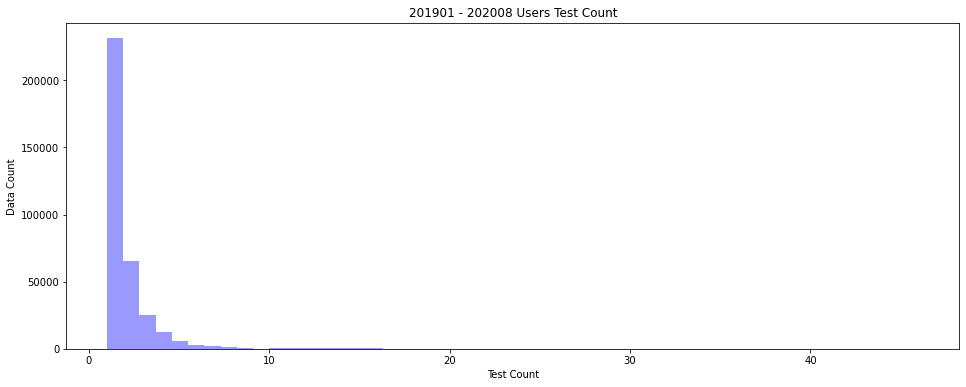

In [75]:
plt.figure(figsize=(16, 6))
sns.distplot(sttus_merged.TEST_CNT, kde=False, color='b')
plt.xlabel('Test Count')
plt.ylabel('Data Count')
plt.title('201901 - 202008 Users Test Count')
plt.show()

In [79]:
print('평균 이용자 측정 횟수 :', round(sttus_merged.TEST_CNT.mean(), 2))

평균 이용자 측정 횟수 : 1.81


즉 일회적인 측정에서 끝나는 것이 아니라 또 측정을 한다는 것을 볼 수 있다.

그럼 코로나 이후의 이용자들의 측정 횟수는 어떻게 될까? 처음 이용하는 사람이 많을까 아님 어떤 목적에 의해서 이용하는 사람들이 많을까? 한 번 살펴보자. 그 전에 재이용 여부 컬럼 `IS_REVISIT`을 생성해주자.

In [98]:
# 재이용 여부
sttus_merged['IS_REVISIT'] = sttus_merged.TEST_CNT > 1
sttus_pre['IS_REVISIT'] = sttus_pre.TEST_CNT > 1
sttus_post['IS_REVISIT'] = sttus_post.TEST_CNT > 1

sttus_post.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,IS_CORONA,IS_TRIP,IS_REVISIT
313512,2,김천,성인,일반,22,관리자,참가상,20200205,F,True,False,True
313513,1,남구(울산),노인,일반,69,관리자,참가상,20200204,M,True,False,False
313514,1,화성,노인,일반,71,관리자,은상,20200204,M,True,False,False
313515,1,사천,노인,일반,75,관리자,은상,20200204,M,True,False,False
313516,1,김천,노인,일반,68,관리자,동상,20200204,M,True,False,False


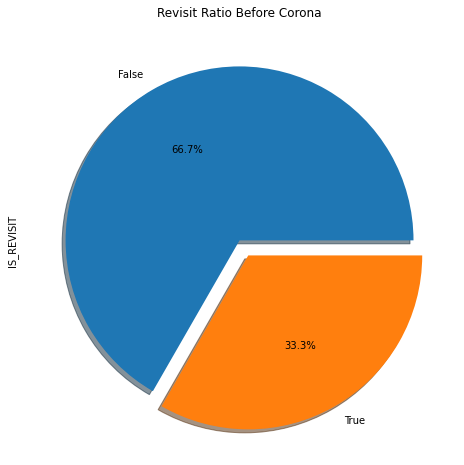

In [104]:
# 코로나 이전 이용자 수의 재방문 여부
plt.figure(figsize=(8, 8))
sttus_pre.IS_REVISIT.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
plt.title('Revisit Ratio Before Corona')
plt.show()

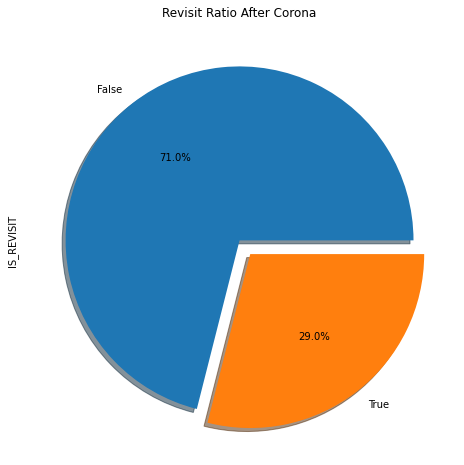

In [105]:
# 코로나 이후 이용자 수의 재방문 여부
plt.figure(figsize=(8, 8))
sttus_post.IS_REVISIT.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
plt.title('Revisit Ratio After Corona')
plt.show()

전체 이용자수가 19%로 감소, 첫 이용자도 20%로 감소, 재방문 이용자는 16%로 감소한 것으로 보아 첫 이용자의 비율이 늘고 재방문 이용자의 비율이 감소한 것을 볼 수 있다.

### 2.2. CENTER_NM
`CENTER_NM`은 측정을 한 센터명을 말한다. 2020년 10월 기준 총 78개의 센터가 있다. 특히 올해 25개의 센터를 개관하였다.

In [116]:
temp = pd.DataFrame(sttus_merged.CENTER_NM.value_counts())
print(f'총 {temp.shape[0]} 곳의 센터가 존재하며 센터는 다음과 같다 :')
print(list(temp.index))

총 71 곳의 센터가 존재하며 센터는 다음과 같다 :
['연수', '남구(울산)', '마포', '전주', '삼척', 'KSPO송파(출장)', '세종', '서구(대전)', '동작', '충주', '남구(부산)', '성동', 'KSPO송파', '사하', '강릉', '사천', '사상', '금천', '달서', '성남', '부천', '순천', '춘천', '의정부', '동구(광주)', '오산', '안동', '청주', '서초', '증평', '광산', '화성', '창원', '원주', '포항', '목포', '제주', '천안', '영동', '남원', '나주', '북구(부산)', '곡성', '노원', '스포원(금정)', 'KSPO아산(출장)', '군산', '김천', '북구(광주)', '계룡', '구미', 'KSPO아산', '시흥', 'KSPO송파(출장A)', 'KSPO송파(출장B)', 'KSPO대구(출장A)', 'KSPO대구(출장B)', 'KSPO대구', '창원마산회원', '익산', '영암', '포천', '진천', '경산', '고양', '영주', '광주', '정읍', '태백', 'KSPO광주', 'KSPO(버스)']


우선 센터의 평균 이용자 수를 살펴보자.

In [125]:
print('2019년 1월부터 2020년 8월까지의 센터별 평균 이용자 수 :', sttus_merged.CENTER_NM.value_counts().mean())
print('2019년 1월부터 2020년 8월까지의 최대 이용자 수 :', sttus_merged.CENTER_NM.value_counts().max())
print('2019년 1월부터 2020년 8월까지의 최소 이용자 수 :', sttus_merged.CENTER_NM.value_counts().min())

2019년 1월부터 2020년 8월까지의 센터별 평균 이용자 수 : 4954.549295774648
2019년 1월부터 2020년 8월까지의 최대 이용자 수 : 10217
2019년 1월부터 2020년 8월까지의 최소 이용자 수 : 2


In [118]:
# 센터별 이용자 수 상위 20 곳
sttus_merged.CENTER_NM.value_counts()[:20]

연수            10217
남구(울산)         9388
마포             9175
전주             8775
삼척             8770
KSPO송파(출장)     8656
세종             8411
서구(대전)         8268
동작             8090
충주             7903
남구(부산)         7792
성동             7593
KSPO송파         7554
사하             7506
강릉             7426
사천             7391
사상             7250
금천             7242
달서             7157
성남             7120
Name: CENTER_NM, dtype: int64

In [120]:
# 센터별 이용자 수 하위 10 곳
sttus_merged.CENTER_NM.value_counts()[-20:]

KSPO아산         1889
시흥             1633
KSPO송파(출장A)    1400
KSPO송파(출장B)     931
KSPO대구(출장A)     590
KSPO대구(출장B)     585
KSPO대구          527
창원마산회원          526
익산              308
영암              154
포천              122
진천               97
경산               77
고양               66
영주               60
광주               58
정읍               33
태백                3
KSPO광주            2
KSPO(버스)          2
Name: CENTER_NM, dtype: int64

각 센터의 이름이 있지만 지역을 바로 알기 어렵고 새로 개관한 곳도 있기 때문에 국민체력100 홈페이지에 명시된 지역 분류를 따라 센터를 분류해보자.

In [133]:
seoul = ['KSPO송파', 'KSPO송파(출장)', 'KSPO송파(출장A)', 'KSPO송파(출장B)', '금천', '노원', '동작', '마포', '서초', '성동']
busan = ['사상', '사하', '남구(부산)', '스포원(금정)', '북구(부산)']
daegu = ['KSPO대구', 'KSPO대구(출장A)', 'KSPO대구(출장B)', '달서']
incheon = ['연수']
gwangju = ['KSPO광주', '북구(광주)', '동구(광주)', '광산']
daejeon = ['서구(대전)']
ulsan = ['남구(울산)']
gyeonggi = ['포천', '고양', '광주', '시흥', '의정부', '성남', '오산', '부천', '화성']
gangwon = ['태백', '삼척', '춘천', '강릉', '원주']
chungbuk = ['진천', '증평', '충주', '영동', '청주', ]
chungnam = ['KSPO아산', 'KSPO아산(출장)', '계룡', '천안']
jeonbuk = ['정읍', '익산', '군산', '전주', '남원']
jeonnam = ['영암', '나주', '곡성', '순천', '목포']
gyeongbuk = ['영주', '경산', '구미', '김천', '안동', '포항']
gyeongnam = ['창원마산회원', '사천', '창원']
jeju = ['제주']
sejong = ['세종']

In [136]:
total = seoul + busan + daegu + incheon + gwangju + daejeon + ulsan + gyeonggi + gangwon + chungbuk +\
        chungnam + jeonbuk + jeonnam + gyeongbuk + gyeongnam + jeju + sejong

In [ ]:
# 대표 지역으로 분류
def get_region(df):
    if df.

## 4. 데이터 시각화

### 4.1. 월별 이용자 추이

In [49]:
date, users = [], []

for df in sttus:
    date.append(str(df.loc[0, 'TEST_YMD'])[:6])
    users.append(df.shape[0])
    
monthly_user = pd.DataFrame({'date': date, 'users': users})
monthly_user.head(20)

,date,users
0,201901,6187
1,201902,5447
2,201903,27804
3,201904,46988
4,201905,48836
5,201906,29911
6,201907,21101
7,201908,17695
8,201909,28594
9,201910,28081


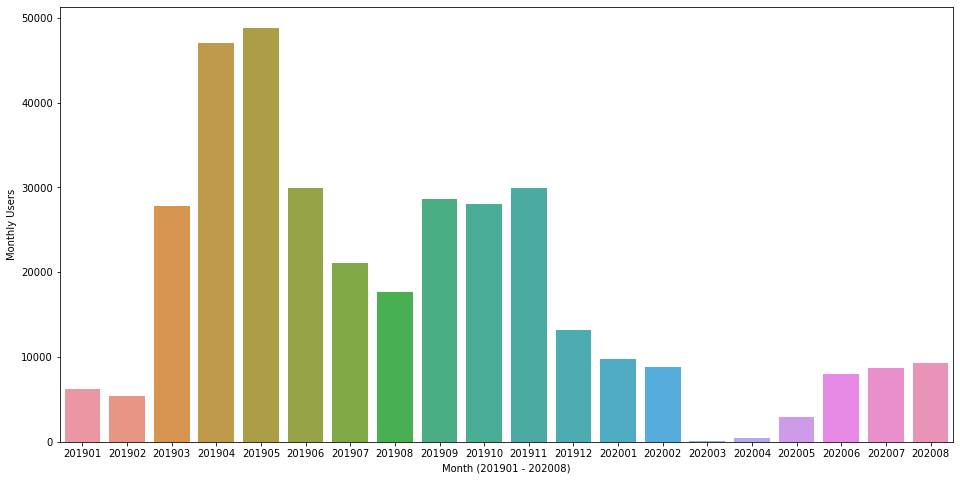

In [31]:
plt.figure(figsize=(16, 8))
sns.barplot(x='date', y='users', data=monthly_user)
plt.xlabel('Month (201901 - 202008)')
plt.ylabel('Monthly Users')
plt.show()

작년 이용자 수와 비교했을 때 이용자 수가 많이 줄어든 것을 볼 수 있다.

## 

## 4.2. 이용자 특징 분석

### 4.2.1. 데이터 살펴보기

In [52]:
# 코로나 이전 데이터프레임 정보
sttus_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307325 entries, 0 to 307324
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   TEST_CNT   307325 non-null  int64 
 1   CENTER_NM  307325 non-null  object
 2   AGE_GBN    307325 non-null  object
 3   TEST_GBN   301232 non-null  object
 4   TEST_AGE   307325 non-null  int64 
 5   INPUT_GBN  301232 non-null  object
 6   CERT_GBN   307325 non-null  object
 7   TEST_YMD   307325 non-null  int64 
 8   TEST_SEX   307325 non-null  object
dtypes: int64(3), object(6)
memory usage: 21.1+ MB


In [58]:
# 코로나 이후 데이터프레임 정보
sttus_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48016 entries, 0 to 48015
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TEST_CNT   48016 non-null  int64 
 1   CENTER_NM  48003 non-null  object
 2   AGE_GBN    48016 non-null  object
 3   TEST_GBN   48016 non-null  object
 4   TEST_AGE   48016 non-null  int64 
 5   INPUT_GBN  46842 non-null  object
 6   CERT_GBN   48016 non-null  object
 7   TEST_YMD   48016 non-null  int64 
 8   TEST_SEX   48016 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.3+ MB


In [55]:
# 코로나 이전 데이터 결측치 개수
sttus_pre.isnull().sum()

TEST_CNT        0
CENTER_NM       0
AGE_GBN         0
TEST_GBN     6093
TEST_AGE        0
INPUT_GBN    6093
CERT_GBN        0
TEST_YMD        0
TEST_SEX        0
dtype: int64

In [59]:
# 코로나 이후 데이터 결측치 개수
sttus_post.isnull().sum()

TEST_CNT        0
CENTER_NM      13
AGE_GBN         0
TEST_GBN        0
TEST_AGE        0
INPUT_GBN    1174
CERT_GBN        0
TEST_YMD        0
TEST_SEX        0
dtype: int64

In [53]:
# 성별
age_

,TEST_CNT,TEST_AGE,TEST_YMD
count,307325.000000,307325.000000,3.073250e+05
mean,1.820571,32.548136,2.019099e+07
std,2.077486,22.288095,1.674202e+03
min,1.000000,11.000000,2.019020e+07
25%,1.000000,16.000000,2.019043e+07
50%,1.000000,20.000000,2.019062e+07
75%,2.000000,52.000000,2.019100e+07
max,46.000000,104.000000,2.020013e+07
